# Online and Offline Shopping Dataset

#### Online and offline shopping represent two distinct modes of purchasing goods and services. Shopping is the process of selecting and purchasing goods or services for personal use or consumption. It is a fundamental aspect of daily life and plays a significant role in the economy. Here's an overview of key aspects related to shopping:
#### Types of Shopping:
#### Retail Shopping: This involves purchasing goods from physical stores such as supermarkets, department stores, specialty shops, and malls.
#### Online Shopping: With the rise of e-commerce, consumers can now shop for goods and services online through websites and mobile apps, often with the convenience of home delivery.

#### Attribute Details:

| Column                    | Meaning                                                                 |   Data Type
|:--------------------------|:-----------------------------------------------------------------------:|:------------------:|
|  CustomerID               |  Unique identifier for each customer.                                   |   Numeric |
|  Gender                   |  Gender of the customer (e.g., Male, Female).e                          |   Categorical|
|  Location                 |  Location or address information of the customer.                       |   Text|
|  Tenure_Months            |  Number of months the customer has been associated with the platform.   |   Numeric |
|  Transaction_ID           |  Unique identifier for each transaction.                                |   Numeric|
|  Transaction_Date         |  Date of the transaction.                                               |   Date|
|  Product_SKU              |  Stock Keeping Unit (SKU) identifier for the product.                   |   Text |
|  Product_Description      |  Description of the product.                                            |   Text|
|  Product_Category         |  Category to which the product belongs.                                 |   Categorical|
|  Quantity                 |  Quantity of the product purchased in the transaction.                  |   Numeric |
|  Avg_Price                |  Average price of the product.                                          |   Numeric|
|  Delivery_Charges         |  Charges associated with the delivery of the product.                   |   Numeric|
|  Coupon_Status            |  Status of the coupon associated with the transaction.                  |   Categorical|
|  GST                      |   Goods and Services Tax associated with the transaction.               |   Numeric |
|  Date                     |  Date of the transaction (potentially redundant with Transaction_Date). |   Date|
|  Offline_Spend            |  Amount spent offline by the customer.                                  |   Numeric|
|  Online_Spend             | Amount spent online by the customer.                                    |   Numeric|
|  Month                    |  Month of the transaction.                                              |   Categorical|
|  Coupon_Code              |  Code associated with a coupon, if applicable.                          |   Text|
|  Discount_pct             |  Percentage of discount applied to the transaction.                     |   Numeric |

##### 1. Perform the Data Exploration and display dimensions, data types used, unique customers and products.
##### 2. Check for the missing values in the dataset and treat them.
##### 3. Customer Analysis, Product Analysis and Coupon Analysis:
##### Address the following questions:
<i>a.</i> What is the distribution of gender among customers?

<i>b.</i> How is customer tenure distributed?

<i>c.</i> Which locations have the highest number of customers?

<i>d.</i> What are the top-selling product categories?

<i>e.</i> What is the average price of products in each category?

<i>f.</i> How does the quantity purchased vary across different product categories?

<i>g.</i> What are the most frequently purchased product categories?

<i>h.</i> What percentage of transactions involve the use of coupons?

<i>i.</i> How does the average discount percentage vary across different product categories?

<i>j.</i> Is there a difference in spending between customers who use coupons and those who don't?

##### 4. Are there any significant correlations between numerical attributes (e.g., Avg_Price, Quantity, Total_Spend)?
##### How does the correlation between offline and online spending change over time?

##### 5. Split the dataset (Trainging set : Test set = 8 : 2)
##### 6. Design and implement a linear regression model to predict the total spend based on the average price of products. 
##### 7. predict whether a customer will redeem a coupon or not based on their transaction history and demographic information.
##### How accurately can you predict whether a customer will use a coupon based on their past behavior?


In [1]:
#importing all the neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

In [2]:
#Reading the dataset
df = pd.read_csv('file.csv')

### Exploring the datset

Exploring the data is the process of visually and analytically examining a dataset to understand its underlying patterns, distributions, relationships, and potential insights. EDA is an essential step in the data analysis workflow and helps analysts gain a preliminary understanding of the data before proceeding with more advanced analyses or modeling techniques.

In [3]:
#Displaying first five rows of the dataset
df.head()

Unnamed: 0  CustomerID Gender Location  Tenure_Months  Transaction_ID  \
0           0     17850.0      M  Chicago           12.0         16679.0   
1           1     17850.0      M  Chicago           12.0         16680.0   
2           2     17850.0      M  Chicago           12.0         16696.0   
3           3     17850.0      M  Chicago           12.0         16699.0   
4           4     17850.0      M  Chicago           12.0         16700.0   

  Transaction_Date     Product_SKU  \
0       2019-01-01  GGOENEBJ079499   
1       2019-01-01  GGOENEBJ079499   
2       2019-01-01  GGOENEBQ078999   
3       2019-01-01  GGOENEBQ079099   
4       2019-01-01  GGOENEBJ079499   

                                 Product_Description Product_Category  ...  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA  ...   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA  ...   
2             Nest Cam Outdoor Security Camera - USA         Nest-USA  ...   
3    Nest Protect Smoke + CO White Battery Alarm-USA         Nest-USA  ...   
4  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA  ...   

   Avg_Price  Delivery_Charges  Coupon_Status  GST      Date Offline_Spend  \
0     153.71               6.5           Used  0.1  1/1/2019        4500.0   
1     153.71               6.5           Used  0.1  1/1/2019        4500.0   
2     122.77               6.5       Not Used  0.1  1/1/2019        4500.0   
3      81.50               6.5        Clicked  0.1  1/1/2019        4500.0   
4     153.71               6.5        Clicked  0.1  1/1/2019        4500.0   

   Online_Spend  Month  Coupon_Code Discount_pct  
0        2424.5      1       ELEC10         10.0  
1        2424.5      1       ELEC10         10.0  
2        2424.5      1       ELEC10         10.0  
3        2424.5      1       ELEC10         10.0  
4        2424.5      1       ELEC10         10.0  

[5 rows x 21 columns]

In [4]:
#Displaying last five rows of the dataset
df.tail()

Unnamed: 0  CustomerID Gender Location  Tenure_Months  Transaction_ID  \
52950       52950         NaN    NaN      NaN            NaN             NaN   
52951       52951         NaN    NaN      NaN            NaN             NaN   
52952       52952         NaN    NaN      NaN            NaN             NaN   
52953       52953         NaN    NaN      NaN            NaN             NaN   
52954       52954         NaN    NaN      NaN            NaN             NaN   

      Transaction_Date Product_SKU Product_Description      Product_Category  \
52950              NaN         NaN                 NaN            Gift Cards   
52951              NaN         NaN                 NaN  Notebooks & Journals   
52952              NaN         NaN                 NaN               Android   
52953              NaN         NaN                 NaN               Android   
52954              NaN         NaN                 NaN               Android   

       ...  Avg_Price  Delivery_Charges  Coupon_Status GST  Date  \
52950  ...        NaN               NaN            NaN NaN   NaN   
52951  ...        NaN               NaN            NaN NaN   NaN   
52952  ...        NaN               NaN            NaN NaN   NaN   
52953  ...        NaN               NaN            NaN NaN   NaN   
52954  ...        NaN               NaN            NaN NaN   NaN   

      Offline_Spend  Online_Spend  Month  Coupon_Code Discount_pct  
52950           NaN           NaN     11         GC20         20.0  
52951           NaN           NaN     11         NJ20         20.0  
52952           NaN           NaN     10        AND10         10.0  
52953           NaN           NaN     11        AND20         20.0  
52954           NaN           NaN     12        AND30         30.0  

[5 rows x 21 columns]

In [5]:
#Gives names of columns in the dataset
df.columns

Index(['Unnamed: 0', 'CustomerID', 'Gender', 'Location', 'Tenure_Months',
       'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'GST', 'Date', 'Offline_Spend',
       'Online_Spend', 'Month', 'Coupon_Code', 'Discount_pct'],
      dtype='object')

In [6]:
# prints information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

In [7]:
# Gives the statistical details
df.describe()

Unnamed: 0   CustomerID  Tenure_Months  Transaction_ID      Quantity  \
count  52955.000000  52924.00000   52924.000000    52924.000000  52924.000000   
mean   26477.000000  15346.70981      26.127995    32409.825675      4.497638   
std    15286.936089   1766.55602      13.478285     8648.668977     20.104711   
min        0.000000  12346.00000       2.000000    16679.000000      1.000000   
25%    13238.500000  13869.00000      15.000000    25384.000000      1.000000   
50%    26477.000000  15311.00000      27.000000    32625.500000      1.000000   
75%    39715.500000  16996.25000      37.000000    39126.250000      2.000000   
max    52954.000000  18283.00000      50.000000    48497.000000    900.000000   

          Avg_Price  Delivery_Charges           GST  Offline_Spend  \
count  52924.000000      52924.000000  52924.000000   52924.000000   
mean      52.237646         10.517630      0.137462    2830.914141   
std       64.006882         19.475613      0.045825     936.154247   
min        0.390000          0.000000      0.050000     500.000000   
25%        5.700000          6.000000      0.100000    2500.000000   
50%       16.990000          6.000000      0.180000    3000.000000   
75%      102.130000          6.500000      0.180000    3500.000000   
max      355.740000        521.360000      0.180000    5000.000000   

       Online_Spend         Month  Discount_pct  
count  52924.000000  52955.000000  52555.000000  
mean    1893.109119      6.652800     19.953382  
std      807.014092      3.333664      8.127108  
min      320.250000      1.000000     10.000000  
25%     1252.630000      4.000000     10.000000  
50%     1837.870000      7.000000     20.000000  
75%     2425.350000      9.000000     30.000000  
max     4556.930000     12.000000     30.000000

In [8]:
#Gives total rows and columns 
df.shape

(52955, 21)

In [9]:
print(f"There are {len(df.columns)} columns in this dataset.")
print(f"There are {len(df)} rows in this dataset.")

There are 21 columns in this dataset.
There are 52955 rows in this dataset.


In [10]:
#gives information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

### Data Cleaning

Data cleaning, also known as data cleansing or data preprocessing, is the process of identifying and correcting errors, inconsistencies, and inaccuracies in a dataset to ensure its quality and reliability for analysis. It involves several steps aimed at improving the overall integrity and usability of the data.

In [11]:
#Checking for missing values in the dataset
df.isnull().values.any() 

True

In [12]:
#Gives the sum of null values
df.isnull().sum()

Unnamed: 0               0
CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64

Excluding Coupon_Code and Discount_pct, other columns have 31 null data

In [13]:
#Check for duplicated values
print("Duplicate Values =", df.duplicated().sum())
print("data shape :",df.shape)

Duplicate Values = 0
data shape : (52955, 21)


There is no presence of duplicated values in the dataset.

In [14]:
#display last 31 rows from the dataset
df.tail(31)

Unnamed: 0  CustomerID Gender Location  Tenure_Months  Transaction_ID  \
52924       52924         NaN    NaN      NaN            NaN             NaN   
52925       52925         NaN    NaN      NaN            NaN             NaN   
52926       52926         NaN    NaN      NaN            NaN             NaN   
52927       52927         NaN    NaN      NaN            NaN             NaN   
52928       52928         NaN    NaN      NaN            NaN             NaN   
52929       52929         NaN    NaN      NaN            NaN             NaN   
52930       52930         NaN    NaN      NaN            NaN             NaN   
52931       52931         NaN    NaN      NaN            NaN             NaN   
52932       52932         NaN    NaN      NaN            NaN             NaN   
52933       52933         NaN    NaN      NaN            NaN             NaN   
52934       52934         NaN    NaN      NaN            NaN             NaN   
52935       52935         NaN    NaN      NaN            NaN             NaN   
52936       52936         NaN    NaN      NaN            NaN             NaN   
52937       52937         NaN    NaN      NaN            NaN             NaN   
52938       52938         NaN    NaN      NaN            NaN             NaN   
52939       52939         NaN    NaN      NaN            NaN             NaN   
52940       52940         NaN    NaN      NaN            NaN             NaN   
52941       52941         NaN    NaN      NaN            NaN             NaN   
52942       52942         NaN    NaN      NaN            NaN             NaN   
52943       52943         NaN    NaN      NaN            NaN             NaN   
52944       52944         NaN    NaN      NaN            NaN             NaN   
52945       52945         NaN    NaN      NaN            NaN             NaN   
52946       52946         NaN    NaN      NaN            NaN             NaN   
52947       52947         NaN    NaN      NaN            NaN             NaN   
52948       52948         NaN    NaN      NaN            NaN             NaN   
52949       52949         NaN    NaN      NaN            NaN             NaN   
52950       52950         NaN    NaN      NaN            NaN             NaN   
52951       52951         NaN    NaN      NaN            NaN             NaN   
52952       52952         NaN    NaN      NaN            NaN             NaN   
52953       52953         NaN    NaN      NaN            NaN             NaN   
52954       52954         NaN    NaN      NaN            NaN             NaN   

      Transaction_Date Product_SKU Product_Description      Product_Category  \
52924              NaN         NaN                 NaN             Notebooks   
52925              NaN         NaN                 NaN             Notebooks   
52926              NaN         NaN                 NaN             Notebooks   
52927              NaN         NaN                 NaN                  Nest   
52928              NaN         NaN                 NaN                  Nest   
52929              NaN         NaN                 NaN                  Nest   
52930              NaN         NaN                 NaN           Accessories   
52931              NaN         NaN                 NaN             Notebooks   
52932              NaN         NaN                 NaN             Notebooks   
52933              NaN         NaN                 NaN             Notebooks   
52934              NaN         NaN                 NaN                  Nest   
52935              NaN         NaN                 NaN                  Nest   
52936              NaN         NaN                 NaN                  Nest   
52937              NaN         NaN                 NaN             Notebooks   
52938              NaN         NaN                 NaN             Notebooks   
52939              NaN         NaN                 NaN             Notebooks   
52940              NaN         NaN                 NaN                  Nest   
52941 

Which shows the presence of null values, so let's drop them

In [15]:
#remove the last 31 entries from the dataset.
cleaned_df = df[:-31]

In [16]:
#Drop the first column 'Unnamed: 0' which does not contain any information
cleaned_df.drop(columns='Unnamed: 0', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_24584\872285353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop(columns='Unnamed: 0', inplace=True)


In [17]:
cleaned_df.shape

(52924, 20)

After removing 'Unnamed: 0' column size is reduced to 20.

In [18]:
print(f"After dropping last 31 rows and one column, shape of the dataset is {cleaned_df.shape}.")
print(f"There are {len(cleaned_df.columns)} columns in this dataset.")
print(f"There are {len(cleaned_df)} rows in this dataset.")

After dropping last 31 rows and one column, shape of the dataset is (52924, 20).
There are 20 columns in this dataset.
There are 52924 rows in this dataset.


In [19]:
#Gives the sum of null values
cleaned_df.isnull().sum()

CustomerID               0
Gender                   0
Location                 0
Tenure_Months            0
Transaction_ID           0
Transaction_Date         0
Product_SKU              0
Product_Description      0
Product_Category         0
Quantity                 0
Avg_Price                0
Delivery_Charges         0
Coupon_Status            0
GST                      0
Date                     0
Offline_Spend            0
Online_Spend             0
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64

The rows with null values in the "Coupon_Code" and "Discount_pct" columns were left unaltered since it is reasonable to conclude that these are transactions that did not involve the usage of a coupon code or discount. 

### Data analysis and visualization

In [20]:
cleaned_df['CustomerID'].shape

(52924,)

In [21]:
print(f"There are {len(cleaned_df['CustomerID'].unique())} unique Customers in the dataset.")

There are 1468 unique Customers in the dataset.


##### Univariate Analysis - Gender

3a. What is the distribution of gender among customers?

In [22]:
df['Gender'].value_counts()

Gender
F    33007
M    19917
Name: count, dtype: int64

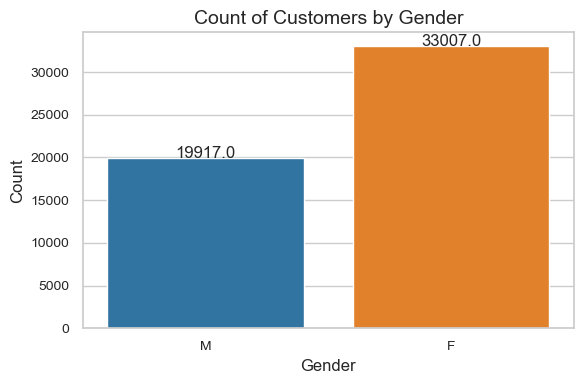

In [23]:
# Set the style of the plot
sns.set(style="whitegrid")

# Define a custom color palette
custom_palette = ["#1f77b4", "#ff7f0e"]  # Blue and orange colors

# Create the count plot with the custom color palette
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Gender', data=cleaned_df, palette=custom_palette)

# Add count values as text annotations on the bars
total = len(cleaned_df['Gender'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1, height, ha='center')

plt.title('Count of Customers by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

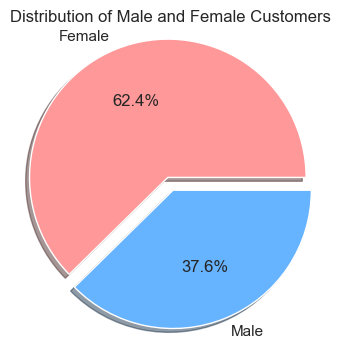

In [24]:
# Calculate the value counts for 'Gender' column
val = df['Gender'].value_counts()
# Define custom colors
custom_colors = ['#FF9999', '#66B3FF']  # Custom colors for Female and Male respectively
# Create a pie chart with custom colors
plt.figure(figsize=(4, 4))
plt.pie(val, labels=['Female', 'Male'], autopct="%1.1f%%", shadow=True, explode=(0.1, 0), colors=custom_colors)
plt.axis('equal')
plt.title('Distribution of Male and Female Customers')
# Set seaborn style
sns.set(style='white')
plt.show()

##### Majority of the customers are female.
As we can see clearly from the Plot, female shoppers are more than 1.5 times that of male shoppers.

##### Univariate Analysis - Location

In [25]:
# Calculate the number of unique locations
unq_location = len(cleaned_df.Location.unique())
print(f"There are {unq_location} different locations throughout this dataset.")

There are 5 different locations throughout this dataset.


In [26]:
#Display Unique Location names
cleaned_df.Location.unique()

array(['Chicago', 'California', 'New York', 'New Jersey', 'Washington DC'],
      dtype=object)

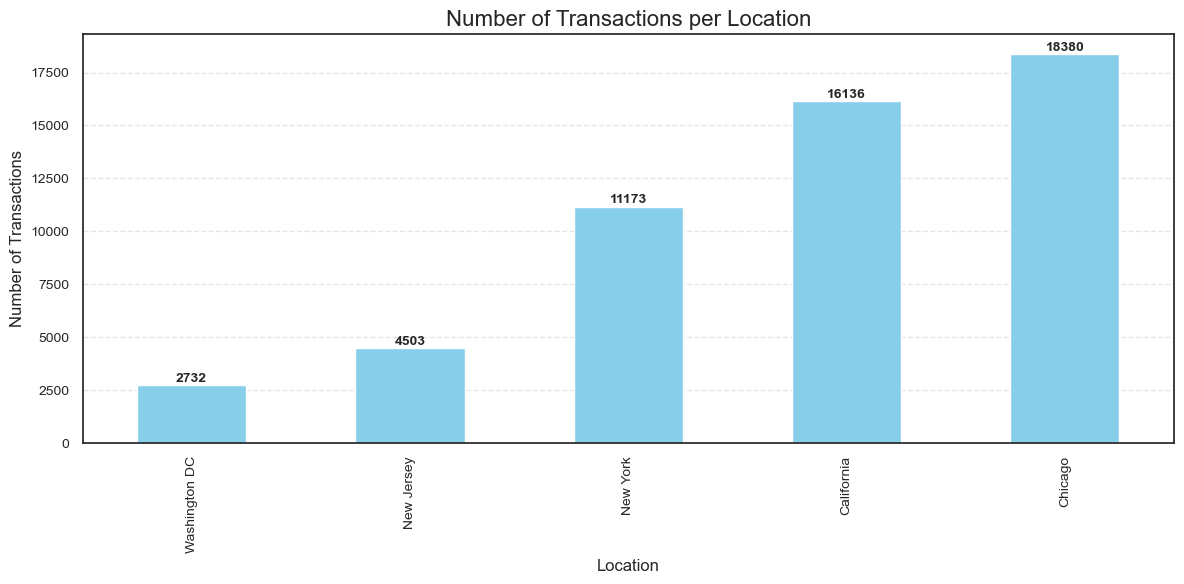

In [27]:
# Group the DataFrame by 'Location' and count the number of transactions per location
transactions_per_location = cleaned_df['Location'].value_counts().sort_values()

# Plot the number of transactions per location
plt.figure(figsize=(12, 6))
bar_plot = transactions_per_location.plot(kind='bar', color='skyblue')

# Add count values as text annotations on the bars
for i, count in enumerate(transactions_per_location):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.title('Number of Transactions per Location', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels and adjust font size
plt.yticks(fontsize=10)  # Adjust font size of y-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add grid lines for better readability
plt.tight_layout()
plt.show()


The graph shows the transactions at five locations in the United States: Washington DC, New Jersey, New York, California, and Chicago. 

###### Insights from the graph:
Chicago has the highest number of transactions, followed by California.
Washington DC has the fewest number of transactions.

##### Univariate Analysis - Tenure Months

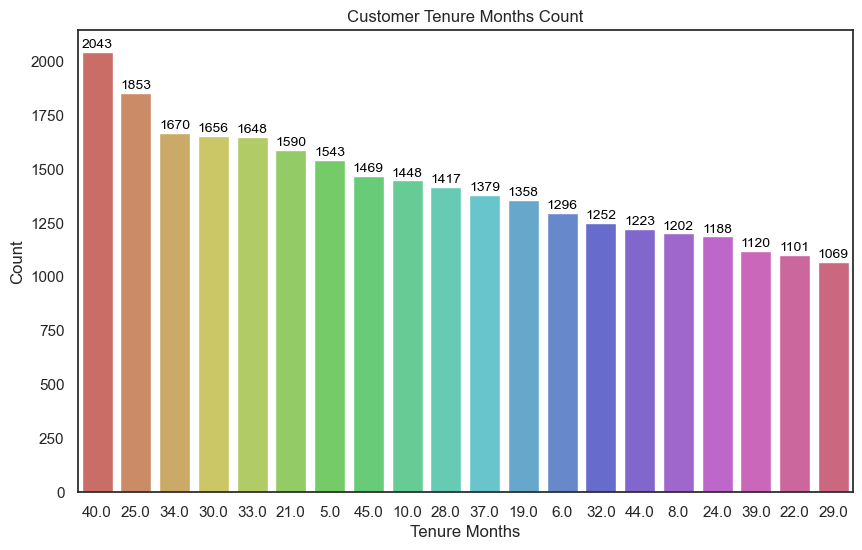

In [28]:
# Get the top 20 tenure months by count
order = cleaned_df["Tenure_Months"].value_counts().iloc[:20].index

# Create the countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=cleaned_df["Tenure_Months"], data=cleaned_df, order=order, palette="hls")

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set plot title and labels
plt.title("Customer Tenure Months Count")
plt.xlabel("Tenure Months")
plt.ylabel("Count")

# Show plot
plt.show()

In [29]:
min_tenure = cleaned_df.Tenure_Months.min()
max_tenure = cleaned_df.Tenure_Months.max()
avg_tenure = cleaned_df.Tenure_Months.mean()
print(f"The minimum of months that a customer has been associated with the platform is {min_tenure} months.\nThe maximum is {max_tenure}, and on average a customer is associated for {avg_tenure:.2f} months with the platform.")

The minimum of months that a customer has been associated with the platform is 2.0 months.
The maximum is 50.0, and on average a customer is associated for 26.13 months with the platform.


##### The majority of customers has been associated with the platform for 40 months.

##### Univariate Analysis - Product Category

In [30]:
#print out an array containing all the unique values present in the 'Product_Category'
cleaned_df.Product_Category.unique()

array(['Nest-USA', 'Office', 'Apparel', 'Bags', 'Drinkware', 'Lifestyle',
       'Waze', 'Headgear', 'Fun', 'Notebooks & Journals', 'Google',
       'Nest-Canada', 'Bottles', 'Gift Cards', 'More Bags', 'Backpacks',
       'Housewares', 'Android', 'Nest', 'Accessories'], dtype=object)

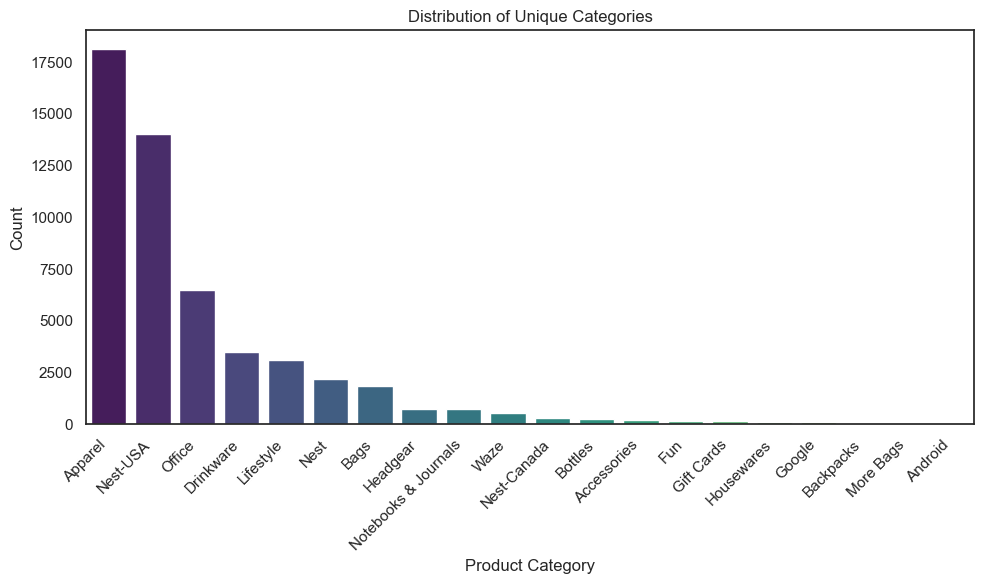

In [31]:
# Count the occurrences of each unique category
category_counts = cleaned_df['Product_Category'].value_counts()

# Plot the distribution of unique categories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Distribution of Unique Categories')
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_24584\2096472043.py:9: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x=freqdata.index, y=percent, palette='Set2')


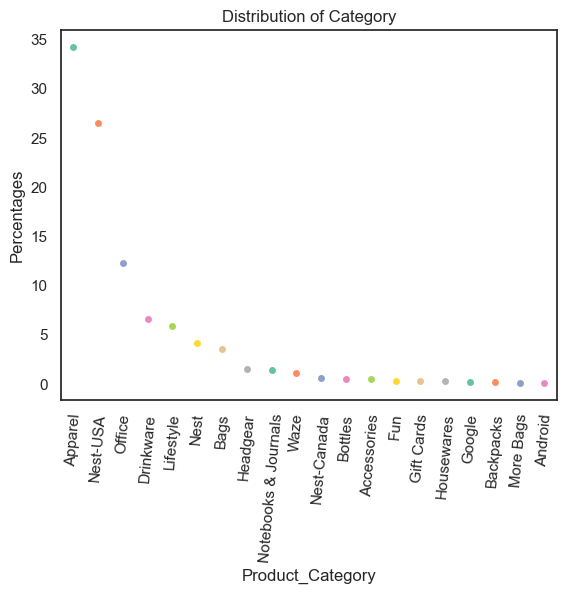

In [32]:
# Get the frequency count of each product category
freqdata = cleaned_df['Product_Category'].value_counts()

# Calculate the percentage of each category
total = freqdata.sum()
percent = (freqdata.values / total) * 100

# Create a swarm plot to visualize the distribution of product categories
sns.swarmplot(x=freqdata.index, y=percent, palette='Set2')
plt.xticks(rotation=85)
plt.title('Distribution of Category')
plt.ylabel('Percentages')
plt.show()

In [33]:
cleaned_df.Product_Category.value_counts()

Product_Category
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Fun                       160
Gift Cards                159
Housewares                122
Google                    105
Backpacks                  89
More Bags                  46
Android                    43
Name: count, dtype: int64

##### The highest sales are attributed to the Apparel product category followed by Nest-USA and Office.

##### Univariate Analysis - Coupon Status

In [34]:
#Check for unique coupon status
cleaned_df['Coupon_Status'].unique()

array(['Used', 'Not Used', 'Clicked'], dtype=object)

In [35]:
df['Coupon_Status'].value_counts()

Coupon_Status
Clicked     26926
Used        17904
Not Used     8094
Name: count, dtype: int64

There are three categories of Coupon Status: 'Used', 'Not Used' and 'Clicked'

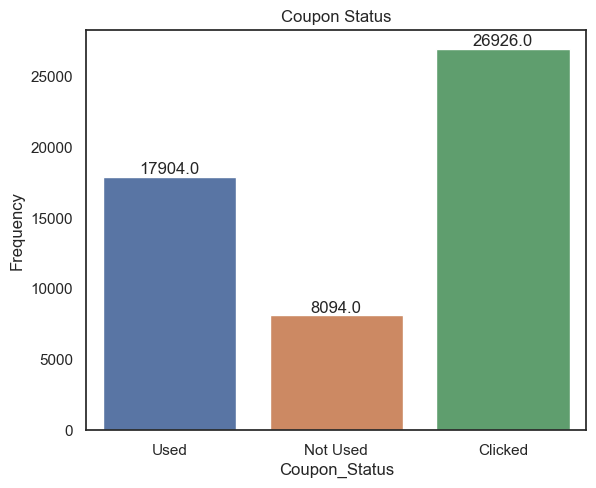

In [36]:
fig = plt.figure(figsize=(5, 4))  # Smaller figure size
axis = fig.add_axes([1, 1, 1, 1])
nd1 = cleaned_df['Coupon_Status']
sns.countplot(data=nd1, x=nd1, ax=axis)

for i in axis.patches:
    axis.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()), 
                  va='bottom', ha='center')

plt.ylabel('Frequency')
plt.title('Coupon Status')
plt.show()

Majority of the coupons were Clicked.These are coupons that were clicked by customers, indicating some level of interest or engagement with the promotional offer. However, it's important to note that clicking a coupon does not necessarily mean it was used to make a purchase.
##### Clicked (26926): This represents the number of coupons that were clicked on by customers, possibly indicating interest.
##### Used (17904): This represents the number of coupons that were successfully redeemed for a purchase.
##### Not Used (8094): This represents the number of coupons that were not redeemed by customers.

##### Coupon Code

In [37]:
#Check for unique coupon code
cleaned_df['Coupon_Code'].unique()

array(['ELEC10', 'OFF10', 'SALE10', 'AIO10', 'EXTRA10', 'WEMP10',
       'HGEAR10', nan, 'NJ10', 'NCA10', 'BT10', 'GC10', 'HOU10', 'AND10',
       'ELEC30', 'OFF30', 'SALE30', 'AIO30', 'EXTRA30', 'WEMP30',
       'HGEAR30', 'NJ30', 'NE30', 'ACC30', 'ELEC20', 'OFF20', 'SALE20',
       'AIO20', 'EXTRA20', 'WEMP20', 'HGEAR20', 'NJ20', 'NCA20', 'HOU20',
       'BT20', 'ACC20', 'NCA30', 'HOU30', 'BT30', 'GC30', 'NE20', 'AND20',
       'GC20', 'NE10', 'ACC10', 'AND30'], dtype=object)

Top 5 coupons claimed by majority of the customers

In [38]:
df['Coupon_Code'].value_counts().head()

Coupon_Code
SALE20    6373
SALE30    5915
SALE10    5838
ELEC10    4826
ELEC30    4647
Name: count, dtype: int64

##### Univariate Analysis - Month

In [39]:
#provides the total sales for each month
df['Month'].value_counts()

Month
8     6151
7     5253
5     4574
12    4506
3     4348
9     4290
6     4195
10    4167
4     4152
1     4065
11    3967
2     3287
Name: count, dtype: int64

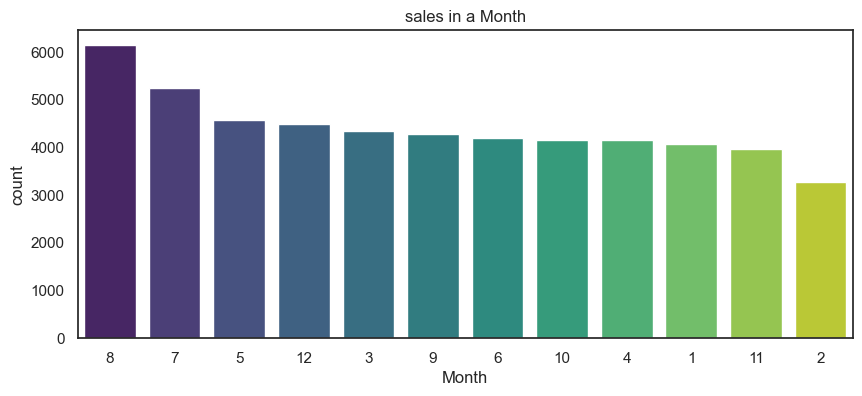

In [40]:
# sales in monthwise
count=cleaned_df["Month"].value_counts().iloc[:12].index
plt.figure(figsize=(10,4))
sns.countplot(x = cleaned_df["Month"], data = cleaned_df, order = count, palette = "viridis")
plt.title("sales in a Month")
plt.show()

##### Most sales occurred in the eighth month i,e, August followed by July.
##### February had the least sale.

##### Univariate Analysis - Discount Percent

In [41]:
# gives total percentage of discount applied
df['Discount_pct'].value_counts()

Discount_pct
20.0    17842
10.0    17479
30.0    17234
Name: count, dtype: int64

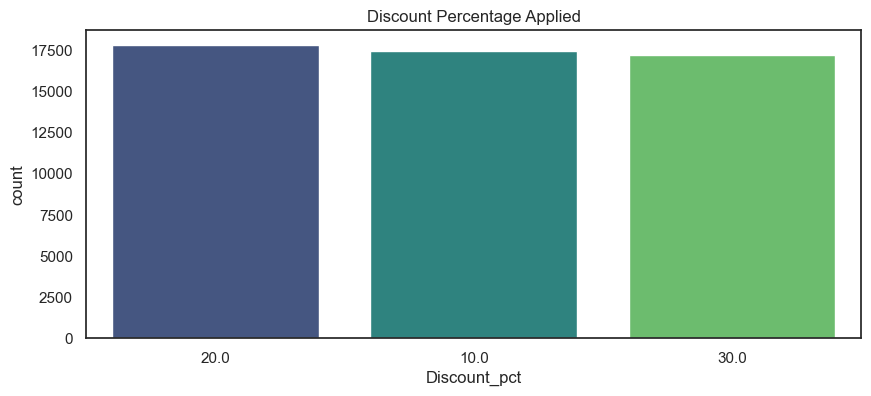

In [42]:
# sales in monthwise
count=cleaned_df["Discount_pct"].value_counts().iloc[:12].index
plt.figure(figsize=(10,4))
sns.countplot(x = cleaned_df["Discount_pct"], data = cleaned_df, order = count, palette = "viridis")
plt.title("Discount Percentage Applied")
plt.show()

##### 20% discount: This discount seems to be the most popular with a count of 17842.
##### 10% discount: Following closely behind is the 10% discount with a count of 17479.
##### 30% discount: The 30% discount appears to be used slightly less frequently with a count of 17234.

##### Bivariate Analysis

Add two extra columns, calculate Total_Price and Total_Spend

In [43]:
cleaned_df.loc[:, 'Total_Price'] = cleaned_df['Avg_Price'] * cleaned_df['Quantity'] + cleaned_df['Delivery_Charges']
cleaned_df.loc[:, 'Total_Spend'] = cleaned_df['Offline_Spend'] + cleaned_df['Online_Spend']

C:\Users\HP\AppData\Local\Temp\ipykernel_24584\878945775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.loc[:, 'Total_Price'] = cleaned_df['Avg_Price'] * cleaned_df['Quantity'] + cleaned_df['Delivery_Charges']
C:\Users\HP\AppData\Local\Temp\ipykernel_24584\878945775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.loc[:, 'Total_Spend'] = cleaned_df['Offline_Spend'] + cleaned_df['Online_Spend']


In [44]:
cleaned_df.head()

CustomerID Gender Location  Tenure_Months  Transaction_ID Transaction_Date  \
0     17850.0      M  Chicago           12.0         16679.0       2019-01-01   
1     17850.0      M  Chicago           12.0         16680.0       2019-01-01   
2     17850.0      M  Chicago           12.0         16696.0       2019-01-01   
3     17850.0      M  Chicago           12.0         16699.0       2019-01-01   
4     17850.0      M  Chicago           12.0         16700.0       2019-01-01   

      Product_SKU                                Product_Description  \
0  GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...   
1  GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...   
2  GGOENEBQ078999             Nest Cam Outdoor Security Camera - USA   
3  GGOENEBQ079099    Nest Protect Smoke + CO White Battery Alarm-USA   
4  GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...   

  Product_Category  Quantity  ...  Coupon_Status  GST      Date  \
0         Nest-USA       1.0  ...           Used  0.1  1/1/2019   
1         Nest-USA       1.0  ...           Used  0.1  1/1/2019   
2         Nest-USA       2.0  ...       Not Used  0.1  1/1/2019   
3         Nest-USA       1.0  ...        Clicked  0.1  1/1/2019   
4         Nest-USA       1.0  ...        Clicked  0.1  1/1/2019   

   Offline_Spend Online_Spend  Month  Coupon_Code  Discount_pct Total_Price  \
0         4500.0       2424.5      1       ELEC10          10.0      160.21   
1         4500.0       2424.5      1       ELEC10          10.0      160.21   
2         4500.0       2424.5      1       ELEC10          10.0      252.04   
3         4500.0       2424.5      1       ELEC10          10.0       88.00   
4         4500.0       2424.5      1       ELEC10          10.0      160.21   

   Total_Spend  
0       6924.5  
1       6924.5  
2       6924.5  
3       6924.5  
4       6924.5  

[5 rows x 22 columns]

In [45]:
cleaned_df.shape

(52924, 22)

After adding Total_Price and Total_Spend, size of column is increased by 2

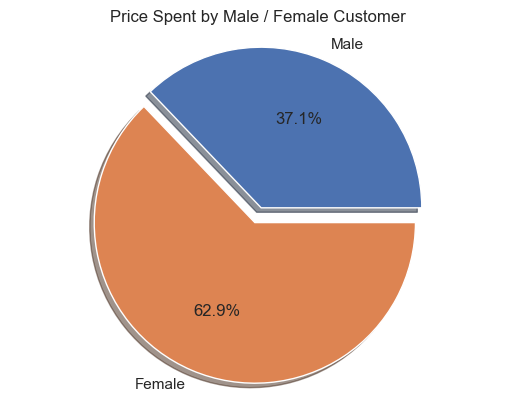

In [46]:
#total money spent by male customers for online and offline baby
male_spend=cleaned_df[['Total_Spend','Gender']].groupby('Gender').get_group('M')['Total_Spend'].sum()

#total money spent by female customers for online and offline baby
female_spend=cleaned_df[['Total_Spend','Gender']].groupby('Gender').get_group('F')['Total_Spend'].sum()

#val stores the total money spent by male and female customers.
val=[male_spend,female_spend]

#create a pie chart
plt.pie(val,labels=['Male','Female'],autopct="%1.1f%%",shadow=True,explode=(0.1,0),)
plt.axis('equal')
plt.title('Price Spent by Male / Female Customer')
sns.set(style='white')

##### Based on the pie chart, female customers spent more than male customers on shopping

In [47]:
#Monthly total spend by male and female customers
monthly_spend=cleaned_df[['Offline_Spend','Online_Spend','Month','Total_Spend']].groupby('Month').sum()
monthly_spend

Offline_Spend  Online_Spend  Total_Spend
Month                                          
1         12365900.0    7686875.17  20052775.17
2          9481400.0    6360136.05  15841536.05
3         10488500.0    6965280.31  17453780.31
4         13459000.0    8196922.13  21655922.13
5          9951500.0    7574021.02  17525521.02
6         11189000.0    7436403.73  18625403.73
7         11563000.0    9055934.41  20618934.41
8         16834500.0   11551233.77  28385733.77
9         11886500.0    7371126.34  19257626.34
10        12722500.0    7813772.39  20536272.39
11        12161500.0    8934799.69  21096299.69
12        17720000.0   11244402.01  28964402.01

Female spend nearly 2 times higher than Males
Similarly females occurrence to shop is high by our previous bar plot

In [48]:
nd2=cleaned_df[['Total_Price','Gender','Location']].groupby('Location')
nd3=[]
nd4=[]
for i in cleaned_df.Location.unique():
    nd3.append((round(nd2.get_group(i)['Total_Price'].sum()),i))
    
y=list(map(lambda x :x[0],nd3))
x=list(map(lambda x :x[1],nd3))

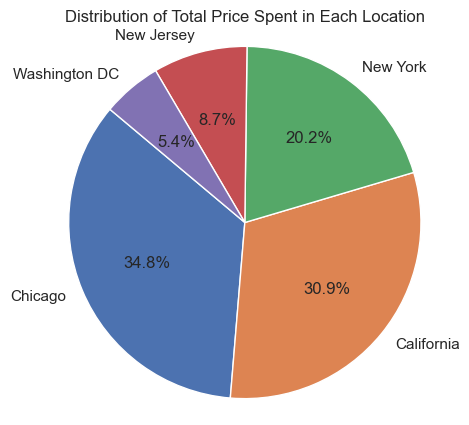

In [49]:
# Plotting a pie chart
plt.figure(figsize=(5, 5))
plt.pie(y, labels=x, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Price Spent in Each Location')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##### The most frequent cities spents high amount in total, Chicago has the highest price spent.

##### Delivery charge vs Avg price

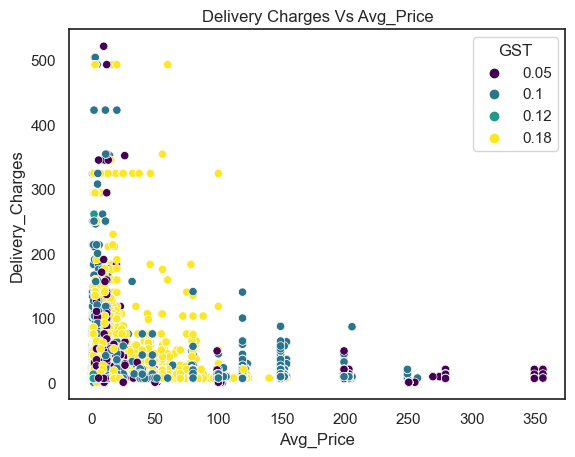

In [50]:
# Create a scatter plot
sns.scatterplot(data=cleaned_df, y='Delivery_Charges', x='Avg_Price', hue='GST', palette='viridis')
plt.title('Delivery Charges Vs Avg_Price')
plt.show()

There are several data points that have a high average price but relatively low delivery charges. This could be due to factors such as special promotions or free shipping offers for expensive items.
There are also a few data points that have a low average price but relatively high delivery charges. This could be due to factors such as the product being bulky or heavy, or the fact that it is being shipped to a remote location.

There are many other factors that can influence delivery charges, such as the size and weight of the product, the shipping distance, and the shipping carrier.

##### Gender VS Location

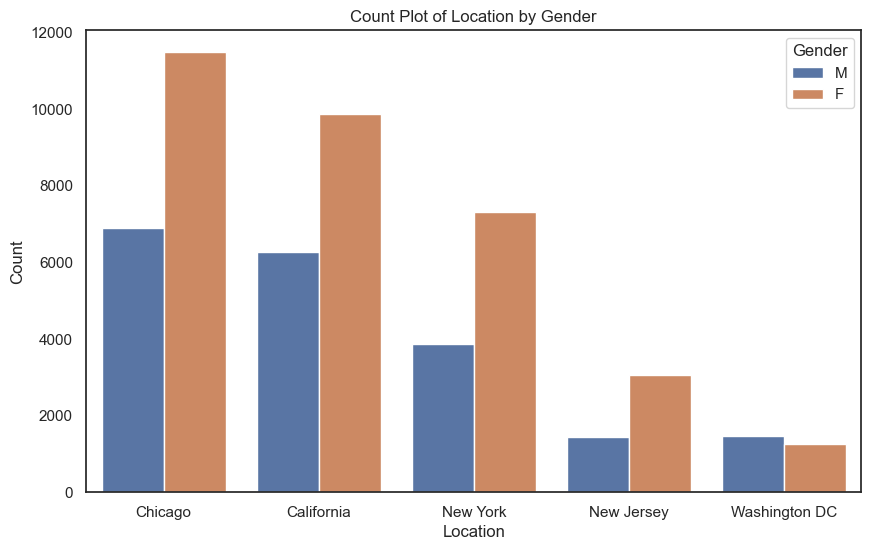

In [51]:
# Define the count_plot function
def count_plot(data, x_axis, hue):
    sns.countplot(data=cleaned_df, x=x_axis, hue=hue)
    plt.title(f"Count Plot of {x_axis} by {hue}")
    plt.xlabel(x_axis)
    plt.ylabel("Count")

# Set the figure size
plt.figure(figsize=(10, 6))

# Call the count_plot function with appropriate parameters
# Replace "Location" and "Gender" with the actual column names from your dataset
count_plot(data=cleaned_df, x_axis="Location", hue="Gender")

# Show the plot
plt.show()

##### Online Spend vs Offline Spend

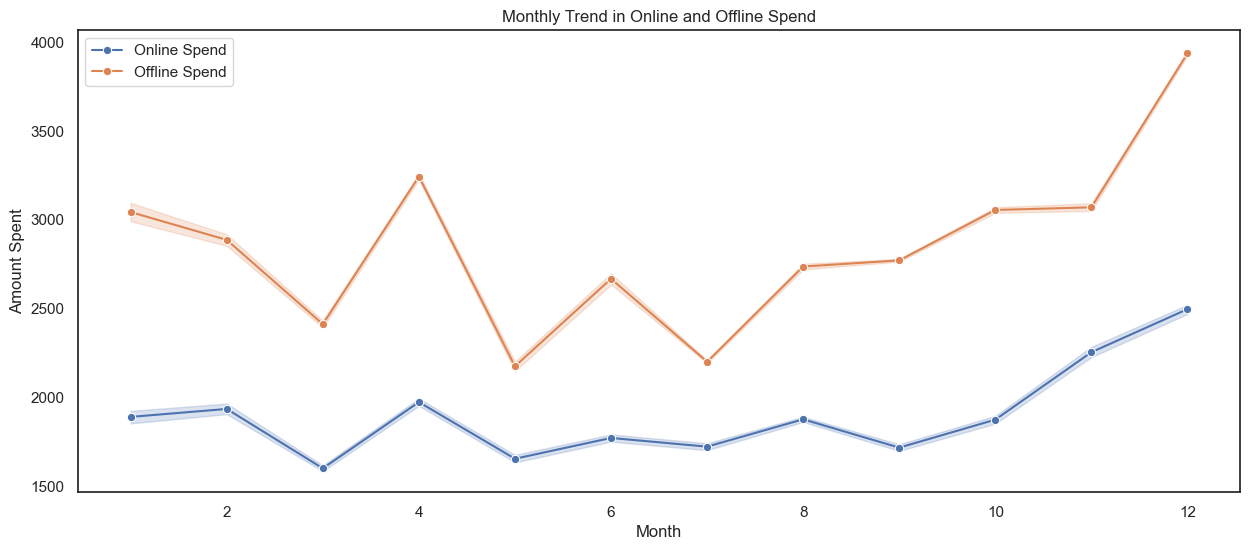

In [52]:
# Visualize the monthly trend in 'Online_Spend' and 'Offline_Spend'
plt.figure(figsize=(15, 6))
sns.lineplot(x='Month', y='Online_Spend', data=df, label='Online Spend', marker='o')
sns.lineplot(x='Month', y='Offline_Spend', data=df, label='Offline Spend', marker='o')
plt.title('Monthly Trend in Online and Offline Spend')
plt.xlabel('Month')
plt.ylabel('Amount Spent')
plt.legend()
plt.show()

##### Gender VS Offline_Spend and Online_Spend

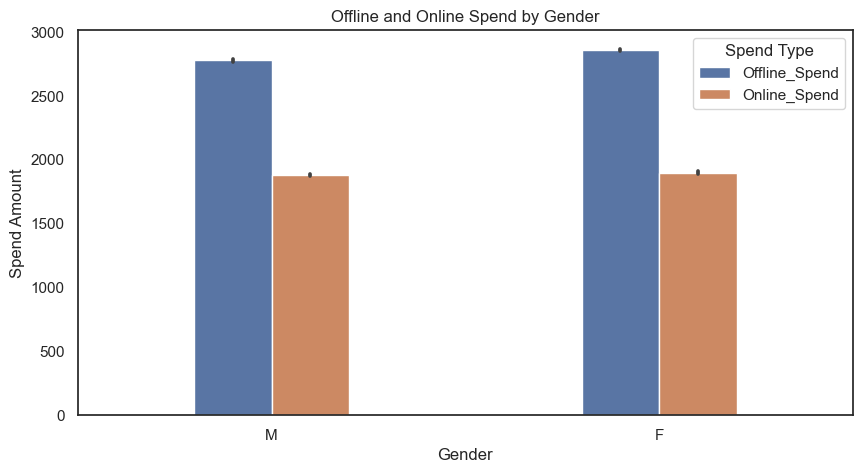

In [53]:
# set figure size
plt.figure(figsize=(10, 5))

# Combine Offline_Spend and Online_Spend into a single DataFrame for plotting
combined_data = pd.melt(cleaned_df, id_vars = 'Gender', value_vars = ['Offline_Spend', 'Online_Spend'],
                        var_name = 'Spend_Type', value_name = 'Spend_Amount')
 
# Create a bar plot
sns.barplot(x='Gender', y = 'Spend_Amount', hue = 'Spend_Type', data = combined_data, width = 0.4)
 
plt.xlabel('Gender')
plt.ylabel('Spend Amount')
plt.title('Offline and Online Spend by Gender')
plt.legend(title='Spend Type')
plt.show()

##### Location VS Offline_Spend and Online_Spend

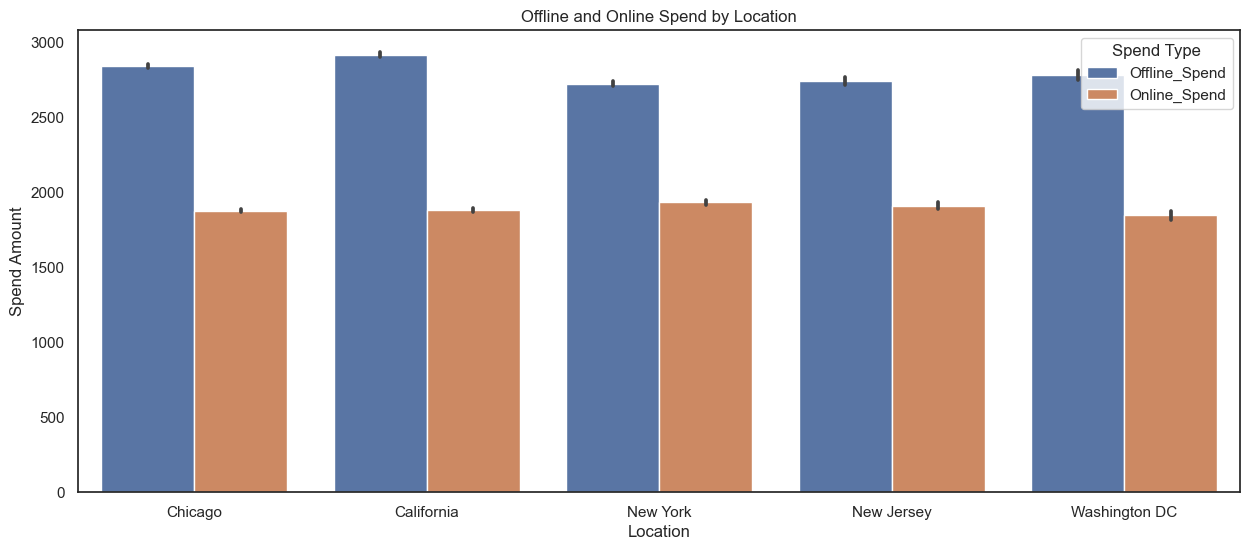

In [54]:
# set figure size
plt.figure(figsize=(15, 6))

# Combine Offline_Spend and Online_Spend into a single DataFrame for plotting
combined_data = pd.melt(cleaned_df, id_vars = 'Location', value_vars = ['Offline_Spend', 'Online_Spend'],
                        var_name = 'Spend_Type', value_name = 'Spend_Amount')

# Create a bar plot
sns.barplot(x = 'Location', y = 'Spend_Amount', hue = 'Spend_Type', data = combined_data)

plt.xlabel('Location')
plt.ylabel('Spend Amount')
plt.title('Offline and Online Spend by Location')
plt.legend(title='Spend Type')
plt.show()

##### Gender vs Product Category

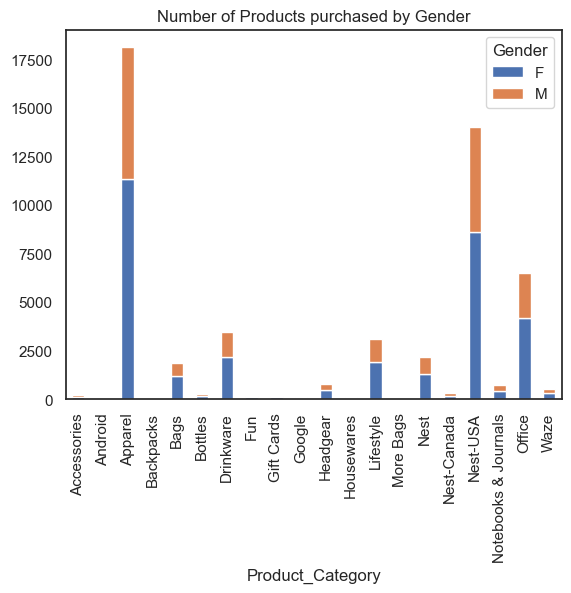

In [55]:
df2 = cleaned_df.groupby(['Product_Category', 'Gender'])['Product_Category'].count().unstack('Gender')
#stacked bar chart
ax=df2[['F','M']].plot(kind='bar', stacked=True, title='Number of Products purchased by Gender')

##### Product_Category vs Total_Price

In [56]:
import plotly.express as px

dfcat=cleaned_df.groupby('Product_Category')['Total_Price'].sum()
dfcate=dfcat.sort_values(ascending=False).reset_index()
px.pie(dfcate, values='Total_Price', names='Product_Category', title='Total Price By Category')

### Correlation

In [57]:
#let us check for correlation between different columns
cleaned_df.corr(numeric_only=True)

CustomerID  Tenure_Months  Transaction_ID  Quantity  \
CustomerID          1.000000      -0.024431       -0.091476 -0.008174   
Tenure_Months      -0.024431       1.000000        0.022163  0.006867   
Transaction_ID     -0.091476       0.022163        1.000000 -0.028456   
Quantity           -0.008174       0.006867       -0.028456  1.000000   
Avg_Price           0.003685      -0.000785        0.126397 -0.113996   
Delivery_Charges   -0.006316      -0.014848       -0.085840  0.191383   
GST                 0.000468      -0.001239       -0.098705 -0.027921   
Offline_Spend      -0.004611       0.040070        0.199053 -0.004768   
Online_Spend       -0.017872       0.025865        0.165261  0.010741   
Month              -0.090332       0.019378        0.995517 -0.027278   
Discount_pct        0.000337       0.029703        0.241759 -0.011381   
Total_Price        -0.013738       0.006056        0.030465  0.509349   
Total_Spend        -0.013132       0.040916        0.224047  0.002946   

                  Avg_Price  Delivery_Charges       GST  Offline_Spend  \
CustomerID         0.003685         -0.006316  0.000468      -0.004611   
Tenure_Months     -0.000785         -0.014848 -0.001239       0.040070   
Transaction_ID     0.126397         -0.085840 -0.098705       0.199053   
Quantity          -0.113996          0.191383 -0.027921      -0.004768   
Avg_Price          1.000000         -0.107799 -0.575393       0.094225   
Delivery_Charges  -0.107799          1.000000  0.028240      -0.013329   
GST               -0.575393          0.028240  1.000000      -0.072826   
Offline_Spend      0.094225         -0.013329 -0.072826       1.000000   
Online_Spend       0.061082         -0.019512 -0.046661       0.336625   
Month              0.120215         -0.086253 -0.093893       0.200280   
Discount_pct       0.027688         -0.018870 -0.012852       0.051719   
Total_Price        0.423412          0.183280 -0.312604       0.039733   
Total_Spend        0.096359         -0.019779 -0.074165       0.846410   

                  Online_Spend     Month  Discount_pct  Total_Price  \
CustomerID           -0.017872 -0.090332      0.000337    -0.013738   
Tenure_Months         0.025865  0.019378      0.029703     0.006056   
Transaction_ID        0.165261  0.995517      0.241759     0.030465   
Quantity              0.010741 -0.027278     -0.011381     0.509349   
Avg_Price             0.061082  0.120215      0.027688     0.423412   
Delivery_Charges     -0.019512 -0.086253     -0.018870     0.183280   
GST                  -0.046661 -0.093893     -0.012852    -0.312604   
Offline_Spend         0.336625  0.200280      0.051719     0.039733   
Online_Spend          1.000000  0.165525      0.024343     0.033757   
Month                 0.165525  1.000000      0.236194     0.027755   
Discount_pct          0.024343  0.236194      1.000000    -0.003024   
Total_Price           0.033757  0.027755     -0.003024     1.000000   
Total_Spend           0.786376  0.225002      0.047696     0.045157   

                  Total_Spend  
CustomerID          -0.013132  
Tenure_Months        0.040916  
Transaction_ID       0.224047  
Quantity             0.002946  
Avg_Price            0.096359  
Delivery_Charges    -0.019779  
GST                 -0.074165  
Offline_Spend        0.846410  
Online_Spend         0.786376  
Month                0.225002  
Discount_pct         0.047696  
Total_Price          0.045157  
Total_Spend          1.000000

<Axes: >

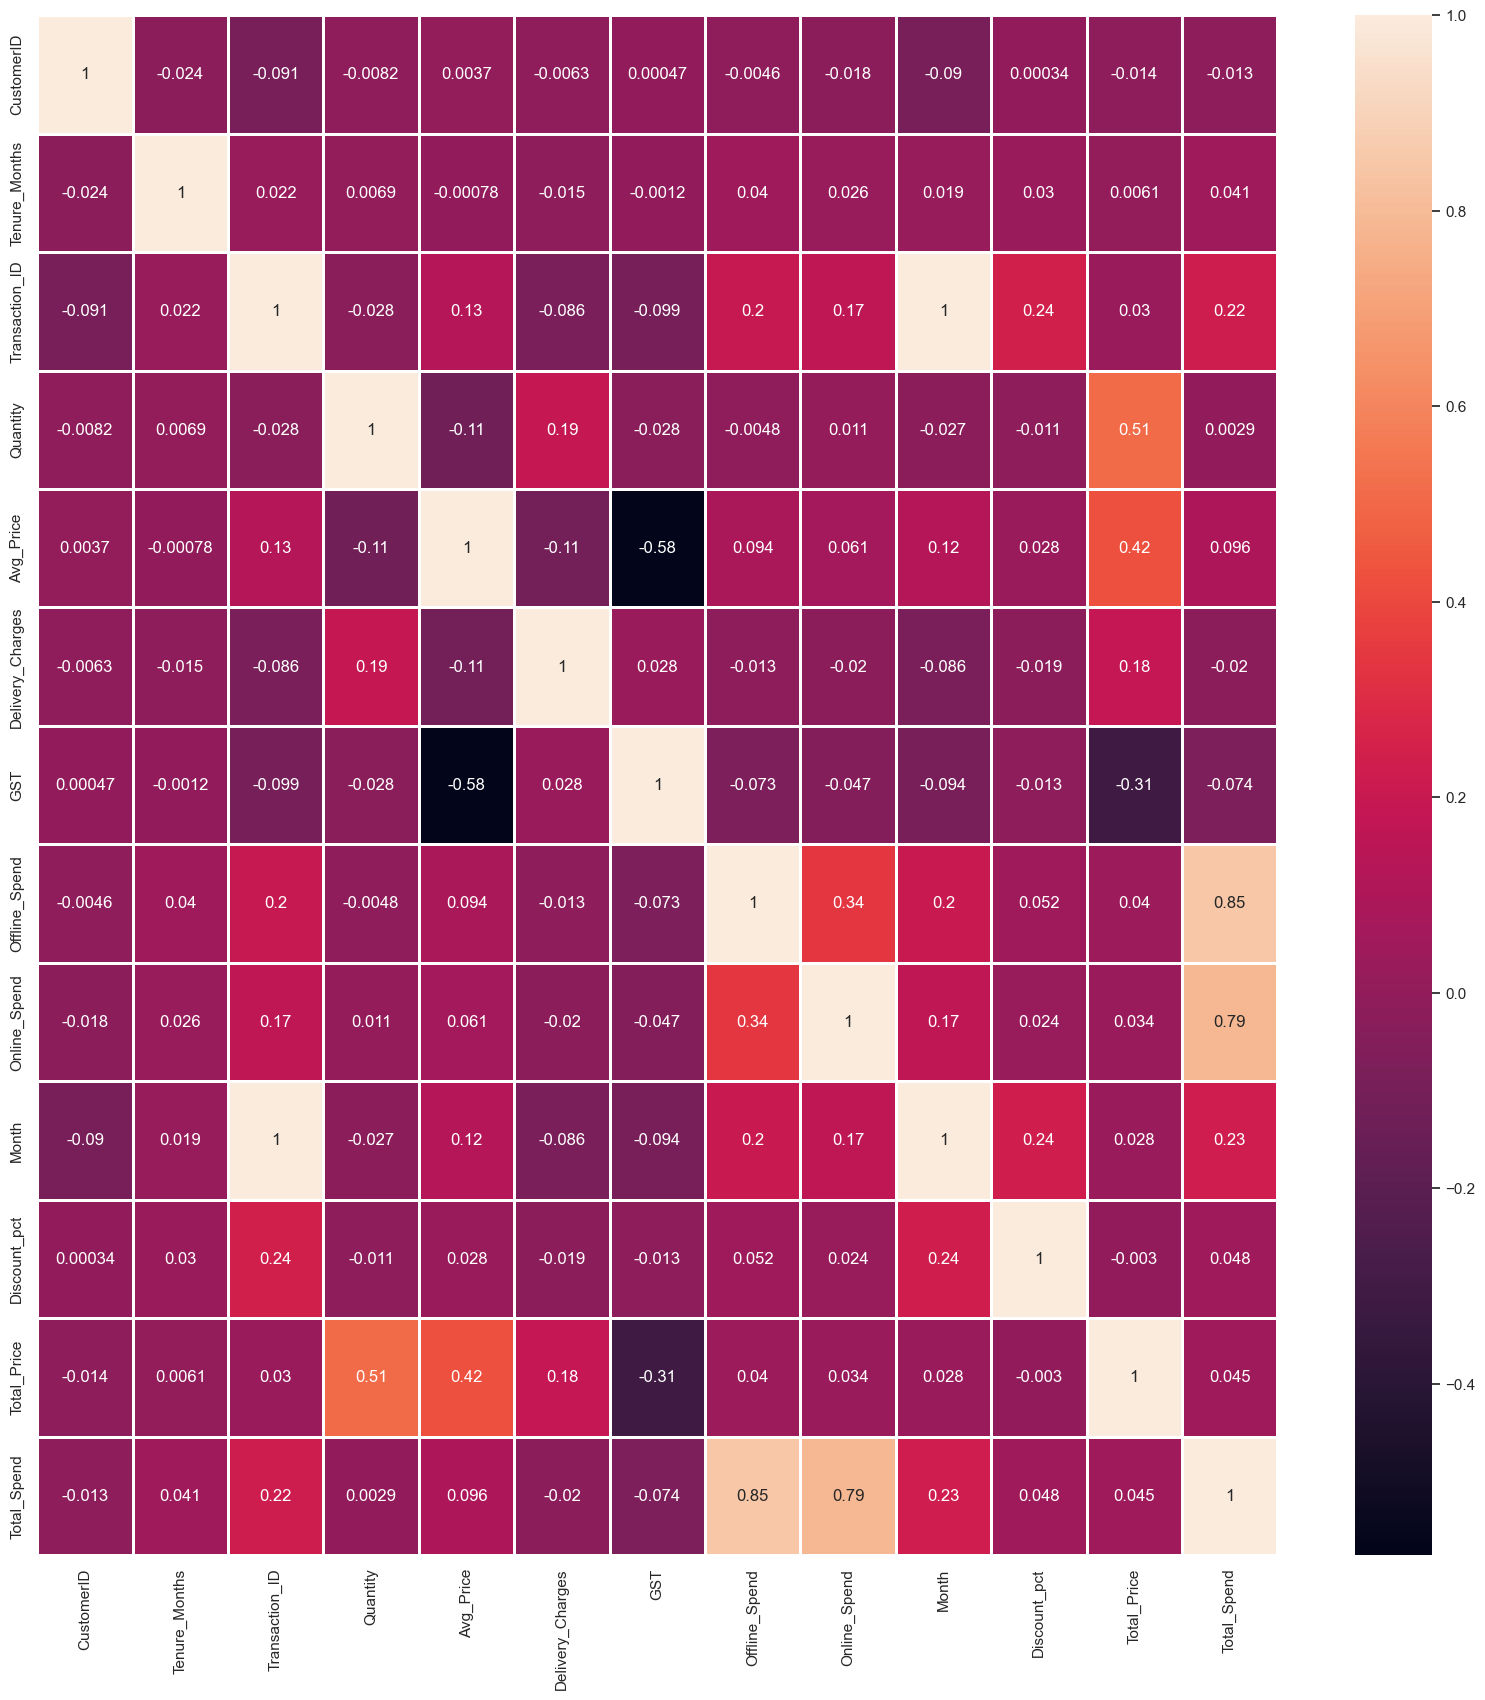

In [58]:
plt.figure(figsize=(20,20))
sns.heatmap(cleaned_df.corr(numeric_only=True), annot=True, linewidth=1)

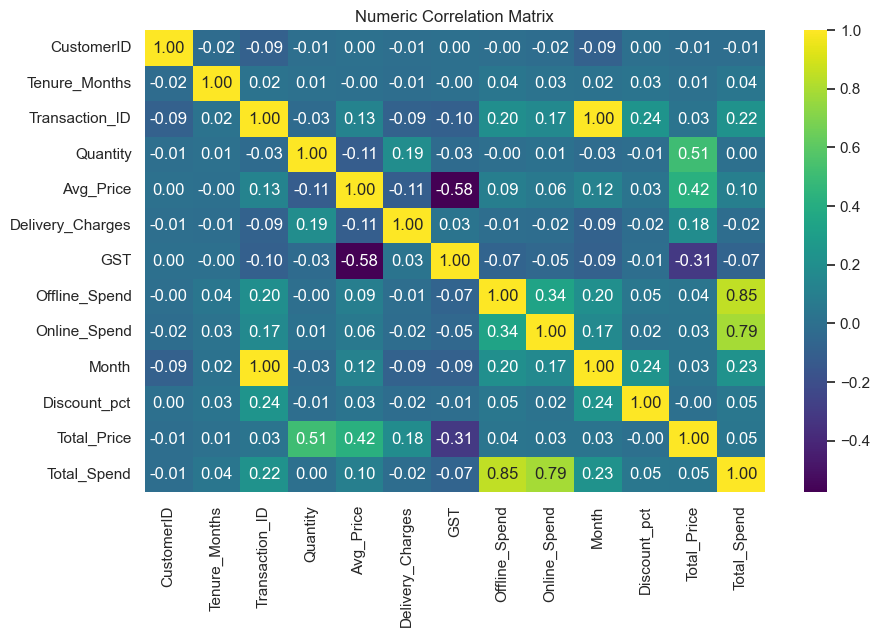

In [59]:
plt.figure(figsize=(10, 6))
numeric_correlation_matrix = cleaned_df.corr(numeric_only=True)
sns.heatmap(numeric_correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Numeric Correlation Matrix')
plt.show()

correlation matrix that shows the correlation between different variables.
The strength of the correlation is indicated by the value in the matrix. A value of 1 indicates a perfect positive correlation, while a value of -1 indicates a perfect negative correlation. Values closer to 0 indicate weaker correlations.
The sign of the correlation indicates whether the correlation is positive or negative.
A positive correlation means that the two variables tend to move in the same direction. A negative correlation means that the two variables tend to move in opposite directions.

<Axes: title={'center': 'Feature-correlation (pearson)'}>

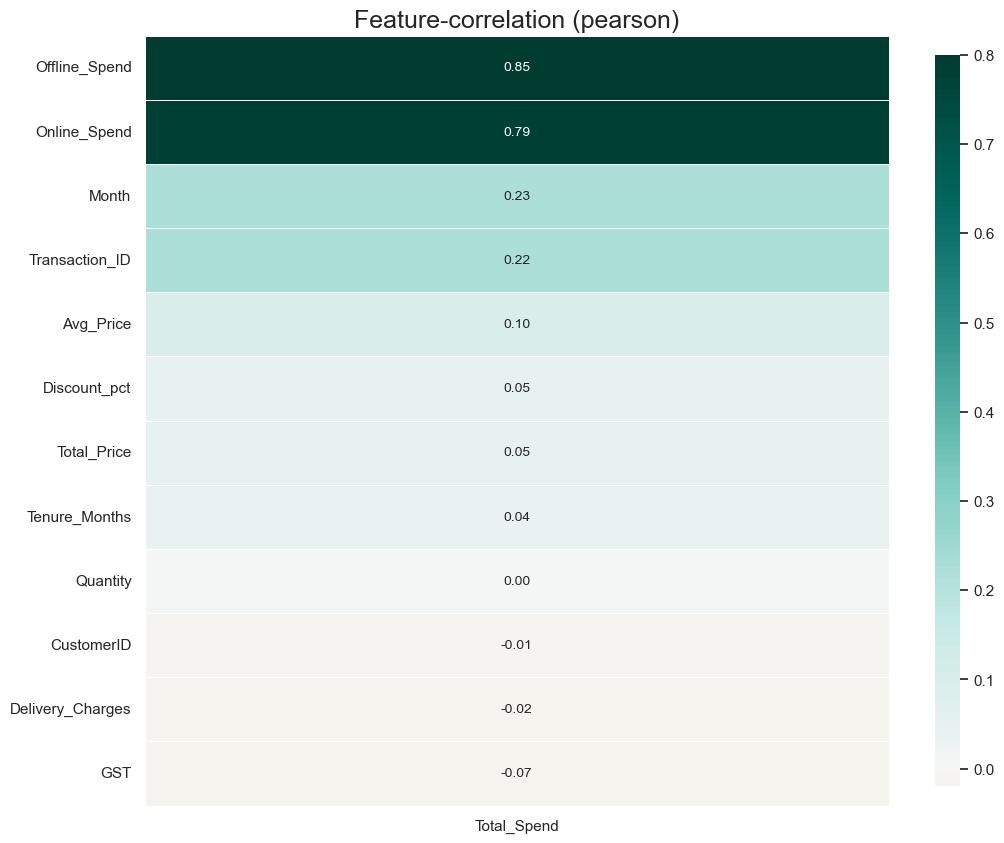

In [60]:
from warnings import  filterwarnings
filterwarnings('ignore')
import klib
klib.corr_plot(cleaned_df, target='Total_Spend')

Offline_Spend, Online_Spend, Month, Transaction_ID and Avg_Price show high positive correlation with respect to Total_Spend, while GST shows the least negative correlation.

### Linear Regression

##### Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the independent variables (predictors) and the dependent variable (outcome). 
Linear regression is widely used for predicting the value of the dependent variable based on the values of the independent variables.

In [61]:
#testing data containing 80% of the entire data;
train, test = train_test_split(cleaned_df, test_size=0.2, random_state=42)
print("The Shape of training set: ", train.shape)
print("The Shape of testing set: ",test.shape)

reg = linear_model.LinearRegression()
X_train_b = train[['Offline_Spend', 'Online_Spend', 'Transaction_ID', 'Avg_Price']]
y_train_b = train['Total_Spend']

X_test_b = test[['Offline_Spend', 'Online_Spend', 'Transaction_ID', 'Avg_Price']]
y_test_b = test['Total_Spend']

reg.fit(X_train_b, y_train_b)
print("y = x *", reg.coef_, "+", reg.intercept_)

predicted_b = reg.predict(X_test_b)
mse_b = ((np.array(y_test_b)-predicted_b)**2).sum()/len(y_test_b)
r2_b = r2_score(y_test_b, predicted_b)
rmse_b = np.sqrt(mse_b)
print("MSE:", mse_b)
print("R Squared:", r2_b)
print("RMSE: ", rmse_b)

The Shape of training set:  (42339, 22)
The Shape of testing set:  (10585, 22)
y = x * [1.00000000e+00 1.00000000e+00 1.62898680e-17 1.91360084e-16] + 1.8189894035458565e-12
MSE: 7.425882565405967e-25
R Squared: 1.0
RMSE:  8.617356070980221e-13


##### linear regression model indicates a perfect fit, as the R-squared value is 1.0 and the MSE is extremely close to zero. This suggests that the model perfectly predicts the total spend based on the features provided.
 
The Mean Squared Error (MSE) is 7.425882565405967e-25, which is extremely close to zero. This indicates very low error in the predictions made by the model.
The R-squared value is 1.0, which means that the model explains 100% of the variance in the target variable (Total_Spend). This indicates a perfect fit of the model to the data.
The Root Mean Squared Error (RMSE) is 8.617356070980221e-13, which is also extremely close to zero. This further confirms the very low error in the predictions made by the model.

### Logistic Regression

##### Logistic regression is a statistical method used for binary classification, which means it's used to predict the probability of a binary outcome (such as "yes" or "no", "spam" or "not spam", etc.) based on one or more independent variables.

In logistic regression, the output or dependent variable Y is categorical and represents one of two classes (e.g., 0 or 1). The output of the logistic regression model is the probability that a given input belongs to a particular class. 

#### 7.predict whether a customer will redeem a coupon or not based on their transaction history and demographic information.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# Encode categorical variables
le = LabelEncoder()
cleaned_df['Gender'] = le.fit_transform(cleaned_df['Gender'])
cleaned_df['Product_Category'] = le.fit_transform(cleaned_df['Product_Category'])
cleaned_df['Coupon_Status'] = le.fit_transform(cleaned_df['Coupon_Status'])

# Select features and target variable
X = cleaned_df[['Gender', 'Tenure_Months', 'Product_Category', 'Quantity', 'Avg_Price', 'Offline_Spend', 'Online_Spend']]
y = cleaned_df['Coupon_Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
logistic_pred = logistic_model.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, logistic_pred)

# Model evaluation
print("Logistic Regression Accuracy:", logistic_accuracy)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logistic_pred))

Logistic Regression Accuracy: 0.5087387812942844

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67      5385
           1       0.00      0.00      0.00      1583
           2       0.00      0.00      0.00      3617

    accuracy                           0.51     10585
   macro avg       0.17      0.33      0.22     10585
weighted avg       0.26      0.51      0.34     10585



##### The accuracy of the logistic regression model is approximately 50.87%.

##### Precision:
The precision for class 0 (Not Used) is 51%, indicating that 51% of the samples predicted as "Not Used" were actually "Not Used". However, the precision for classes 1 and 2 is 0%, indicating that the model performed poorly in predicting these classes.
##### Recall: 
The recall for class 0 is 100%, indicating that the model correctly identified all instances of "Not Used" class. However, the recall for classes 1 and 2 is 0%, indicating that the model failed to capture any instances of these classes.
##### F1-score: 
The F1-score for class 0 is 67%, which is a harmonic mean of precision and recall. However, the F1-score for classes 1 and 2 is 0%, indicating poor performance.
##### Support: 
The number of samples in each class in the test set.

The logistic regression model achieved an accuracy of around 51%, indicating that it is slightly better than random guessing.
However, the model's performance varies across different classes, with class 0 (Not Used) having relatively better precision and recall compared to classes 1 and 2.
Overall, the logistic regression model may not be suitable for accurately predicting the "Coupon_Status" in this dataset, as it shows poor performance across multiple evaluation metrics. Further optimization or trying different models may be necessary to improve performance.

### K-nearest neighbors (KNN) 

##### KNN is a simple, instance-based learning algorithm used for both classification and regression tasks. 
It's a non-parametric method, meaning it doesn't make explicit assumptions about the functional form of the data. Instead, it memorizes the entire training dataset and makes predictions based on the similarity of new data points to existing data points.

In [63]:
# Step 1: Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Step 2: Evaluate KNN model
knn_train_accuracy = accuracy_score(y_train, knn_model.predict(X_train))
knn_test_accuracy = accuracy_score(y_test, knn_model.predict(X_test))
print("KNN Training Accuracy:", knn_train_accuracy)
print("KNN Test Accuracy:", knn_test_accuracy)

KNN Training Accuracy: 0.659888046481967
KNN Test Accuracy: 0.4478034955125177


##### Training Accuracy: 
The training accuracy of the KNN model is approximately 65.99%. This indicates that the model performs relatively well on the training data.

##### Test Accuracy: 
The test accuracy of the KNN model is approximately 44.78%. This indicates that the model's performance decreases when evaluated on unseen data, suggesting that it may be overfitting to the training data.

The KNN model exhibits a significant drop in accuracy when evaluated on the test set compared to the training set. This suggests that the model may not generalize well to unseen data.
The relatively high training accuracy compared to the test accuracy indicates that the model might be overfitting to the training data, capturing noise and irrelevant patterns.
Further optimization or tuning of hyperparameters may be required to improve the generalization performance of the KNN model. Additionally, considering other algorithms or techniques might be beneficial to achieve better results.

##### Conclusion

The logistic regression model has a slightly higher accuracy (approximately 50.87%) compared to the KNN model (approximately 44.78%) on the test data. However, it's essential not to rely solely on accuracy for model evaluation, as other metrics like precision, recall, and F1-score can provide a more comprehensive understanding of the model's performance, especially in imbalanced datasets.

In this case, while logistic regression has a slightly higher accuracy, both models seem to perform relatively poorly, with accuracies around 50%, suggesting that there might be room for improvement. It's also important to consider the context and requirements of the problem when determining which model is "better." Additionally, further analysis, such as tuning hyperparameters or exploring other algorithms, may be necessary to improve model performance.